In [ ]:
import pandas as pd 

df = pd.read_csv('/home/trainai/data/iqa/koniq10k/koniq10k_scores_and_distributions.csv')
df

In [ ]:
val_dataset = df.sample(frac=0.2, replace=False, random_state=1)
val_dataset

In [ ]:
train_dataset = df[~df['image_name'].isin(val_dataset['image_name'])]
train_dataset

In [ ]:
for idx in val_dataset.index:
    print(val_dataset['image_name'][idx], val_dataset['MOS'][idx])

In [ ]:
import os
import json

task = 'train'
datset = train_dataset if task == 'train' else val_dataset
root = '/home/trainai/data/iqa/koniq10k'
with open(os.path.join(root, f'{task}.json'), 'w') as fout:
    for idx in datset.index:
        metadata = {
            'path': os.path.join(root, '1024x768', datset['image_name'][idx]),
            'score': datset['MOS'][idx] / 5
        }
        json.dump(metadata, fout, ensure_ascii=False)
        fout.write('\n')

In [1]:
from ViTIQA.vitiqa import IQARegressor
from omegaconf import OmegaConf
import torch

config = OmegaConf.load('ViTIQA/config/base.yaml')

model = IQARegressor(config)
pretrained = torch.load('lightning_logs/version_0/checkpoints/epoch=8-step=36261.ckpt')
model.load_state_dict(pretrained['state_dict'], strict=False)

/home/trainai/anaconda3/envs/nghia/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


_IncompatibleKeys(missing_keys=[], unexpected_keys=['model.embedding.patch_emb.0.cached_penc'])

tensor([[ 5.5264e-02, -2.1817e-03,  2.6927e-02, -1.2949e-02, -2.0902e-03,
          1.4265e-03, -4.1968e-03,  1.1677e-02, -1.9783e-02, -1.5532e-03,
         -5.7077e-03, -2.2691e-03,  6.7430e-04, -2.8125e-02,  2.1962e-03,
         -1.9613e-02,  4.5540e-01, -1.6948e-03, -8.6480e-04, -5.2924e-04,
          5.0701e-02, -1.9799e-03, -6.8640e-04, -1.4008e-04,  5.8453e-01,
         -2.6738e-04,  2.9665e-01,  8.3058e-04, -2.2266e-03,  1.1155e-03,
         -4.0486e-03,  5.3586e-03,  3.3315e-01, -2.2403e-03, -6.5301e-03,
         -5.2904e-03, -1.3004e-02, -8.0749e-05,  2.5837e-01,  4.9121e-03,
         -3.3422e-04,  1.2841e-04, -3.3025e-03,  9.3804e-04, -1.6959e-02,
          2.2864e-02, -2.8825e-03, -8.4144e-04, -9.5106e-03, -2.5969e-05,
          7.5884e-04, -3.3365e-04,  2.2556e-03, -3.9828e-04, -6.9516e-02,
         -3.2525e-03,  5.2800e-03, -1.7599e-05, -9.9461e-05, -5.6986e-04,
          1.6225e-02,  4.6621e-03,  2.0516e-03, -3.1647e-02,  1.9435e-03,
          2.5873e-01,  2.9762e-03,  3.

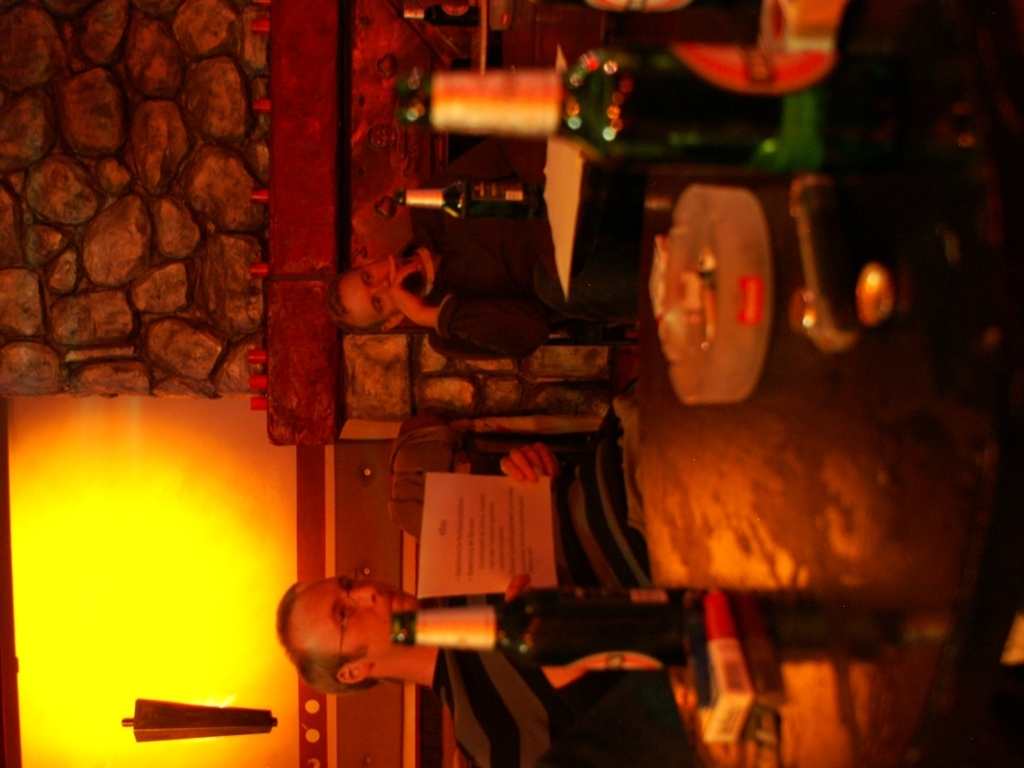

In [2]:
from PIL import Image

img = Image.open('/home/trainai/data/iqa/koniq10k/1024x768/491839128.jpg')
print(model.predict(img))
img

tensor([[ 5.5892e-02, -2.1442e-03,  2.6960e-02,  1.3715e-03, -2.1060e-03,
          1.4606e-03, -4.0938e-03, -2.1250e-02, -2.0093e-02, -1.6094e-03,
          1.2099e-03, -2.4407e-03,  6.6814e-04,  2.1047e-02,  7.7903e-03,
         -2.0023e-02,  1.3171e-01, -1.7839e-03, -9.8583e-04,  4.7513e-03,
          5.1308e-02, -1.9775e-03, -3.1238e-04, -1.0966e-04,  6.0231e-01,
         -2.6622e-04,  3.0505e-01,  9.6569e-04, -2.2760e-03,  1.1573e-03,
         -4.0911e-03,  6.1008e-03,  3.4420e-01, -6.2785e-04, -6.5506e-03,
         -5.2819e-03, -1.5452e-03, -4.4455e-05,  2.6570e-01,  4.6662e-03,
         -3.2487e-04,  1.2115e-04,  1.2392e-02,  9.4057e-04, -1.7424e-02,
          2.3689e-02, -2.8740e-03,  4.5290e-03, -9.9147e-03, -3.2415e-05,
          9.4455e-04, -3.1360e-04,  2.2541e-03, -3.3734e-04,  3.3717e-02,
         -3.2732e-03,  4.9164e-03, -6.5175e-05, -1.0543e-04, -4.9535e-04,
          1.5887e-02,  4.5447e-03,  2.0406e-03, -3.1733e-02,  1.6609e-03,
          2.6690e-01,  3.0176e-03,  3.

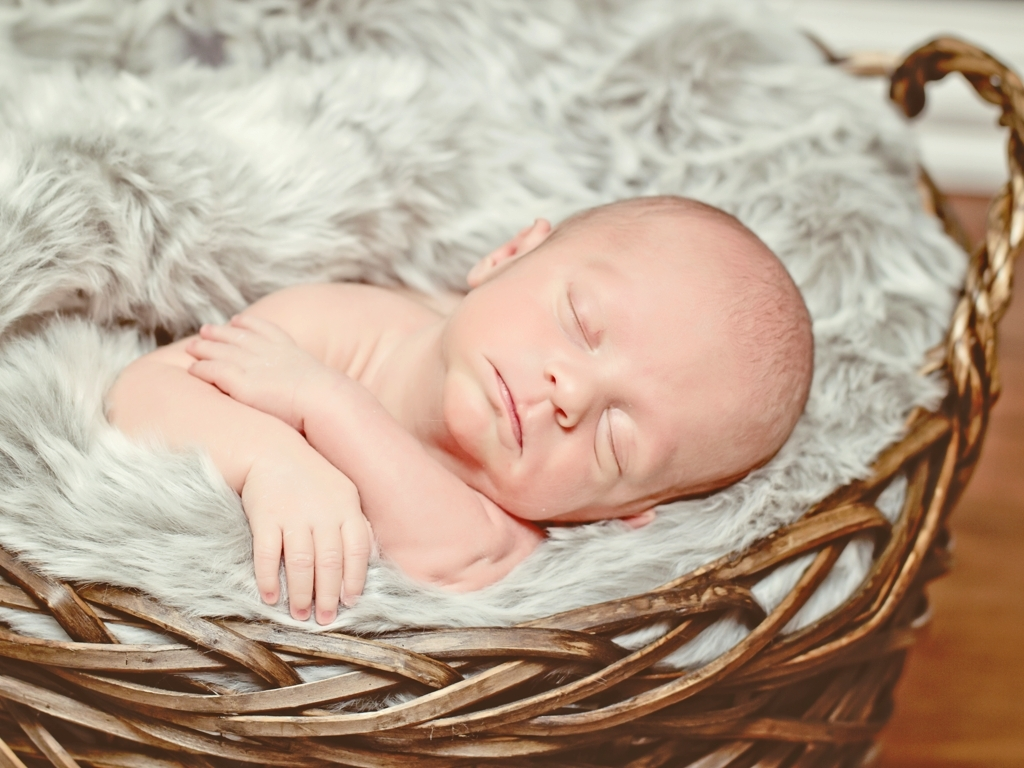

In [3]:
from PIL import Image

img = Image.open('/home/trainai/data/iqa/koniq10k/1024x768/6669002441.jpg')
print(model.predict(img))
img